In [1]:
from fastai.vision import *
import os

In [2]:
path = Path('../project-st-19-01-PredictivePollution/datasets/test_data_small')

In [3]:
path.ls()

[PosixPath('../project-st-19-01-PredictivePollution/datasets/test_data_small/tds_diesel'),
 PosixPath('../project-st-19-01-PredictivePollution/datasets/test_data_small/models'),
 PosixPath('../project-st-19-01-PredictivePollution/datasets/test_data_small/tds_benzin')]

# View Data

In [4]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=360, num_workers=4).normalize(imagenet_stats) #changed size from 224 to 360

In [5]:
data.classes

['tds_benzin', 'tds_diesel']

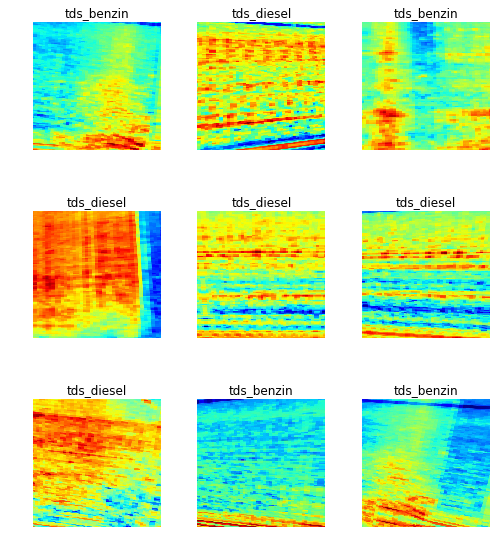

In [6]:
data.show_batch(rows=3, figsize=(7,8))

In [7]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['tds_benzin', 'tds_diesel'], 2, 69, 17)

# Train model

In [8]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [9]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.845776,1.329136,0.529412,00:33
1,0.880410,1.239681,0.529412,00:33
2,0.791881,1.330854,0.529412,00:33
3,0.758682,1.226101,0.529412,00:34
4,0.693373,1.103370,0.529412,00:34
5,0.646234,1.067383,0.470588,00:37
6,0.607711,1.018324,0.411765,00:35
7,0.569122,0.946240,0.411765,00:37


In [10]:
learn.save('stage-1')

In [11]:
learn.unfreeze()

In [12]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


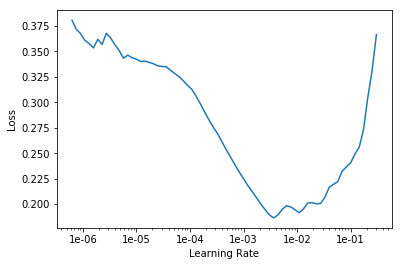

In [14]:
learn.recorder.plot()

In [15]:
learn.fit_one_cycle(10, max_lr=slice(1e-4,2e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.408016,0.859441,0.352941,00:47
1,0.321375,0.834723,0.294118,00:46
2,0.329451,0.660990,0.352941,00:46
3,0.325504,0.522453,0.352941,00:47
4,0.280918,0.637979,0.352941,00:47
5,0.266432,0.427873,0.235294,00:47
6,0.250566,0.305881,0.117647,00:47
7,0.222236,0.268779,0.058824,00:48
8,0.203671,0.275038,0.058824,00:47
9,0.190528,0.274317,0.058824,00:48


In [16]:
learn.save('stage-2')

# Interpretation

In [18]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (69 items)
x: ImageList
Image (3, 360, 360),Image (3, 360, 360),Image (3, 360, 360),Image (3, 360, 360),Image (3, 360, 360)
y: CategoryList
tds_diesel,tds_diesel,tds_diesel,tds_diesel,tds_diesel
Path: ../project-st-19-01-PredictivePollution/datasets/test_data_small;

Valid: LabelList (17 items)
x: ImageList
Image (3, 360, 360),Image (3, 360, 360),Image (3, 360, 360),Image (3, 360, 360),Image (3, 360, 360)
y: CategoryList
tds_benzin,tds_diesel,tds_benzin,tds_diesel,tds_diesel
Path: ../project-st-19-01-PredictivePollution/datasets/test_data_small;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(6

In [19]:
interp = ClassificationInterpretation.from_learner(learn)

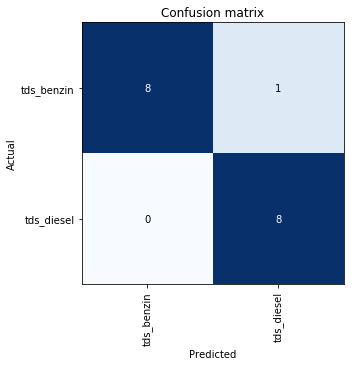

In [21]:
interp.plot_confusion_matrix(figsize=(5, 5))

# model in production

In [24]:
learn.export()

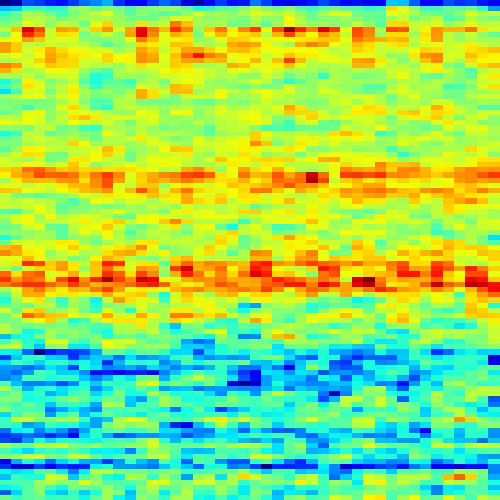

In [27]:
img = open_image('/home/lt/techlabs/project-st-19-01-PredictivePollution/datasets/spect_test_diesel/2-106486-A-44_2.jpg')
img

In [28]:
path

PosixPath('../project-st-19-01-PredictivePollution/datasets/test_data_small')

In [29]:
learn = load_learner(path)

In [30]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category tds_diesel

In [31]:
pred_class = learn.predict(img)
pred_class

(Category tds_diesel, tensor(1), tensor([0.3004, 0.6996]))